# Matplotlib Problem Set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Below is the temperature in degrees Celsius for this day (July 10) in Boston from 1961 to 2010. Plot the temperature on the Y-Axis

In [ ]:
temp_boston = [17.8, 22.8, 17.5, 16.4, 23.35, 25.3, 27.25, 24.45, 22.5, 23.6, 26.7, 22.75, 21.95, 26.4,
23.05, 22.5, 21.1, 26.1, 23.9, 20.25, 27.8, 23.9, 21.7, 19.7, 25.0, 21.4, 21.1, 27.8, 22.25, 27.25, 
23.35, 25.0, 30.0, 25.8, 23.6, 22.5,19.15, 22.8, 23.6, 25.0, 20.8, 21.4, 18.6, 23.05, 25.0, 25.0,
18.35, 25.3, 18.6]

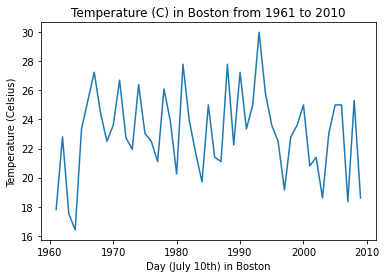

In [ ]:
## YOUR CODE HERE
plt.plot(np.arange(1961, 2010), temp_boston)
plt.xlabel('Day (July 10th) in Boston')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature (C) in Boston from 1961 to 2010')
plt.show()

#### Below is the temperature in degrees Celsius for this day (July 10) in New York from 1961 to 2010. Plot the temperatures of New York and Boston on the same graph in different colors

In [ ]:
temp_new_york =[23.35, 25.25, 20.25, 22.25, 25.85, 25.85, 25.55, 24.2, 22.5, 23.9, 28.3, 22.8, 26.7,
29.7, 23.6, 22.8, 23.05, 26.7, 20.3, 23.65, 28.05, 25.0, 21.4, 21.35, 26.1, 25.25, 28.35, 25.85, 27.5,
26.4, 21.7, 27.2, 32.25, 28.3, 22.5, 23.05, 22.8, 25.0, 24.7, 27.5, 25.85, 24.45, 20.0, 24.15, 26.95,
22.5, 25.85, 27.25, 19.4]

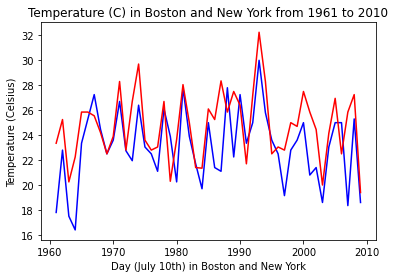

In [ ]:
## YOUR CODE HERE
plt.plot(np.arange(1961, 2010), temp_boston, color="blue")
plt.plot(np.arange(1961, 2010), temp_new_york, color="red")
plt.xlabel('Day (July 10th) in Boston and New York')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature (C) in Boston and New York from 1961 to 2010')
plt.show()

#### Plot the temperatures of New York and Boston on different graphs in the same figure¶

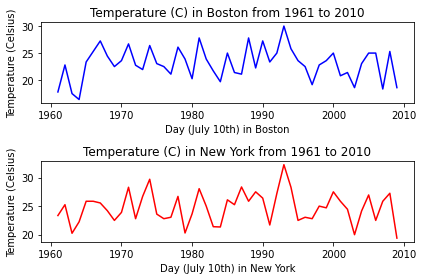

In [ ]:
## YOUR CODE HERE
x = np.arange(1961, 2010)
yBoston = temp_boston
yNY = temp_new_york

plt.subplot(2,1,1) # 1 row, 2 columns, select subaxes number 1
plt.plot(x, yBoston, color = "blue") 
plt.xlabel('Day (July 10th) in Boston')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature (C) in Boston from 1961 to 2010')

plt.subplot(2,1,2)  # 1 row, 2 columns, figure number 2
plt.plot(x, yNY, color = "red")
plt.xlabel('Day (July 10th) in New York')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature (C) in New York from 1961 to 2010')

#space plots nicely
plt.tight_layout()

plt.show()

### Univariate Analysis:

In [ ]:
"""Let's revisit the Dataset_1 again. Read the csv file https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv into a dataframe
and print the first 7 rows"""

## YOUR CODE HERE
data = pd.read_csv("https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv")
data.head(7)
#print(data.iloc[:7])

NameError: ignored

(array([286., 594., 591., 437., 317., 203., 178., 151., 125.,  80.]),
 array([  0.   ,  66.397, 132.794, 199.191, 265.588, 331.985, 398.382,
        464.779, 531.176, 597.573, 663.97 ]),
 <a list of 10 Patch objects>)

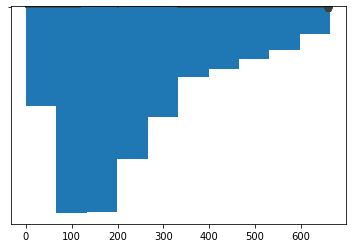

In [ ]:
"""Conduct a Univariate Analysis of the participants' Cholesterol. What is noticeable about it? Create a function
that makes the participants' Cholesterol more Normal and create two visualizations, 
one before the Chol data is modified, and one after Chol data is nmodified to be more Normal than before."""

## YOUR CODE HERE
#sns.boxplot("Chol", data = data)

def more_Normal(dataframe, column): 
  ## YOUR CODE HERE
  arr = np.array(dataframe[column])
  
  #removing outliers
  filtered = arr[abs(arr - np.mean(arr)) < 1.5 * np.std(arr)]

  return filtered

sns.boxplot(more_Normal(data,"Chol"))
plt.hist(more_Normal(data,"Chol")) #better representation of data, more Normal than before, now not as strongly skewed

#Hint: which data visualization shows the outliers?

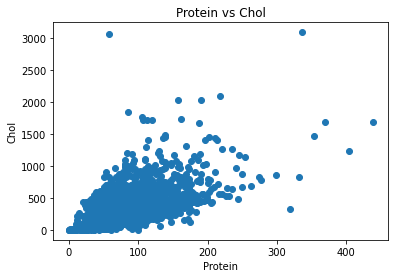

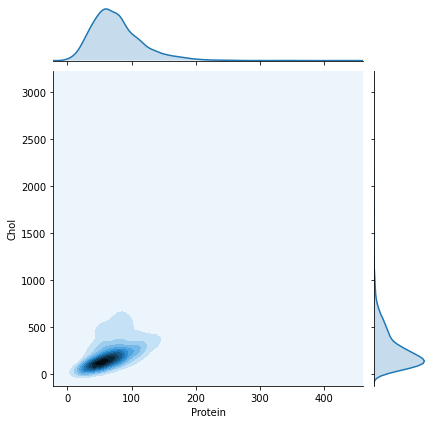

In [ ]:
"""Conduct a Bivariate Analysis for Protein and Chol. What is familar about this compared to the tutorial? What is another 
way to deal with overplotting other than the Hex plot? Create two data visualizations, one that shows the overplotting, the other that 
resolves this issue. After you are done, play around with the sns.kdeplot function or try to create a 3D graph to reduce the effects of overplotting."""

## YOUR CODE HERE
#overplotting
x = data["Protein"]
y = data["Chol"]
plt.scatter(x, y)
plt.xlabel("Protein")
plt.ylabel("Chol")
plt.title("Protein vs Chol")
plt.show()

#resolved overplotting issue
sns.jointplot(x="Protein", y="Chol", data = data, kind="kde")

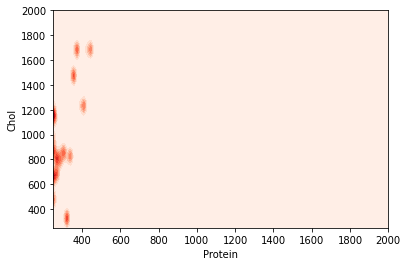

In [ ]:
sns.kdeplot(data["Protein"], data["Chol"], cmap="Reds", shade=True, clip=(2000, 250))

In [ ]:
#3d graph
#not sure if works
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = plt.axes(projection='3d')

data = pd.read_csv("https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv")

def f(x, y):
  return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.array(data["Protein"])
y = np.array(data["Chol"])

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.contour3D(X, Y, Z, 50, cmap = "binary")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')